In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("homicide_by_countries.csv")
df.head(5)

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [5]:
df.columns

Index(['Location', 'Region', 'Subregion', 'Rate', 'Count', 'Year'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [7]:
df.describe()

,Rate,Count,Year
count,195.000000,195.000000,195.000000
mean,6.845128,1942.800000,2017.420513
std,9.600060,6553.343376,3.589445
min,0.000000,0.000000,2006.000000
25%,1.100000,28.000000,2016.000000
50%,2.600000,128.000000,2019.000000
75%,7.850000,785.000000,2020.000000
max,49.300000,47722.000000,2021.000000


In [8]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [9]:
df['Rate'] = df['Rate'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Location   195 non-null    object
 1   Region     195 non-null    object
 2   Subregion  195 non-null    object
 3   Rate       195 non-null    int32 
 4   Count      195 non-null    int64 
 5   Year       195 non-null    int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 8.5+ KB


In [11]:
df1 = df.sort_values('Count', ascending = False)
df1.head()

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020


In [14]:
df1 = df[['Location','Count']].sort_values(by='Count', ascending = False).head(5)
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


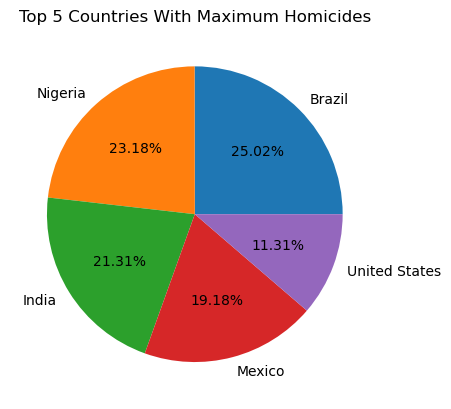

In [17]:
plt.pie(data = df1, x='Count',labels = 'Location',autopct = "%1.2f%%")
plt.title("Top 5 Countries With Maximum Homicides")
plt.show()

In [21]:
df['Region'].replace('Americas','N/S America',inplace = True)

In [22]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

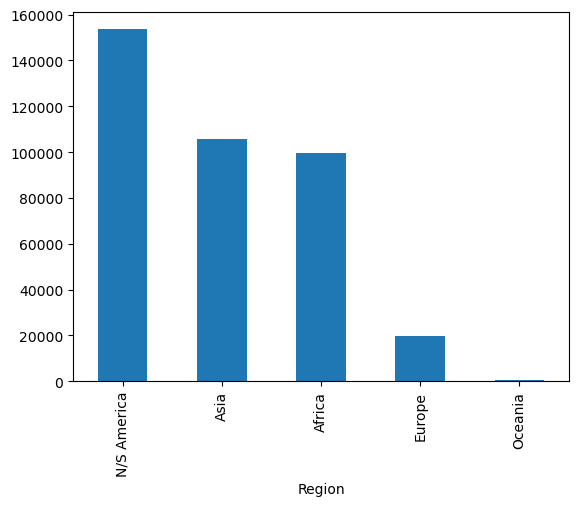

In [26]:
df2.plot(kind='bar')
plt.show()

In [33]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending=False).head(5)
df3

Subregion
South America         78872
Southern Asia         58631
Central America       47371
Western Africa        46318
South-Eastern Asia    25314
Name: Count, dtype: int64

<Axes: ylabel='Count'>

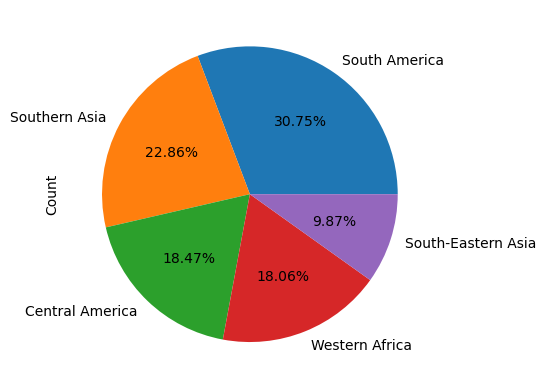

In [36]:
df3.plot(kind='pie',autopct="%1.2f%%")


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'South America'),
  Text(1, 0, 'Southern Asia'),
  Text(2, 0, 'Central America'),
  Text(3, 0, 'Western Africa'),
  Text(4, 0, 'South-Eastern Asia')])

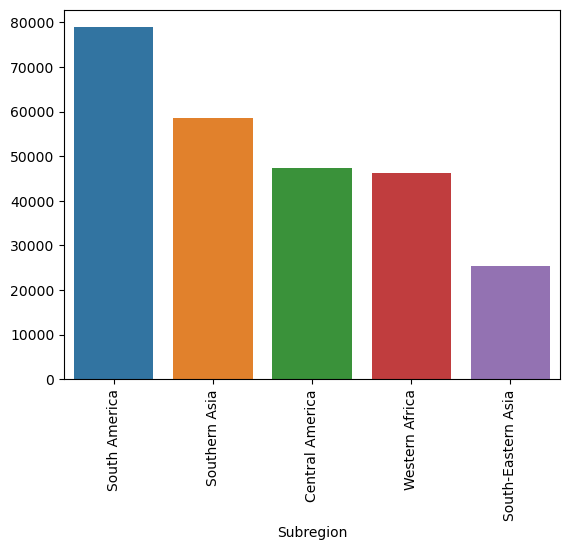

In [39]:
sns.barplot(x = df3.index, y = df3.values)
plt.xticks(rotation=90)

In [40]:
#Only want results where region is Asia or Europe
df[df['Region'].isin(['Asia','Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [43]:
#Same as above line but convinient
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]

In [45]:
#Further we want Years beyond 2016 and only columns Region,Year and Count
df4 = df4[df4['Year'] > 2016][['Region','Year','Count']]

In [47]:
#Region followed by Year wise count of Homicides
df4 = df4.groupby(['Region','Year'])['Count'].sum()
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [48]:
df4.reset_index()

,Region,Year,Count
0,Asia,2017,1787
1,Asia,2018,16923
2,Asia,2019,6458
3,Asia,2020,53516
4,Asia,2021,15299
5,Europe,2017,3670
6,Europe,2018,883
7,Europe,2019,249
8,Europe,2020,15066


In [49]:
df4_unstacked = df4.unstack(level=0)
df4_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [52]:
df4_unstacked.index = df4_unstacked.index.astype(int).astype(str)

Text(0, 0.5, 'Count')

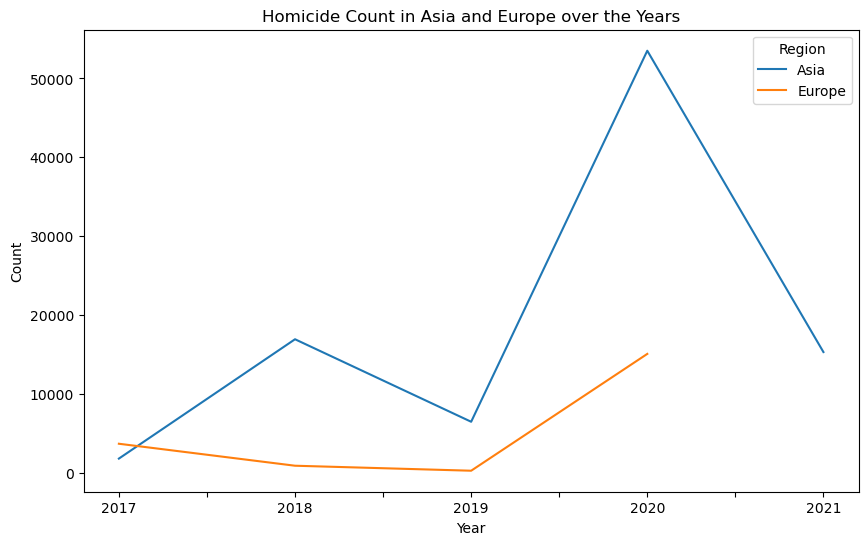

In [55]:
df4_unstacked.plot(kind='line', figsize=(10,6))
plt.title("Homicide Count in Asia and Europe over the Years")
plt.xlabel('Year')
plt.ylabel('Count')

In [56]:
df.head(5)

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012


In [58]:
df5 = df.groupby('Year')['Rate'].sum().sort_values(ascending = False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int32

Text(0, 0.5, 'Rate')

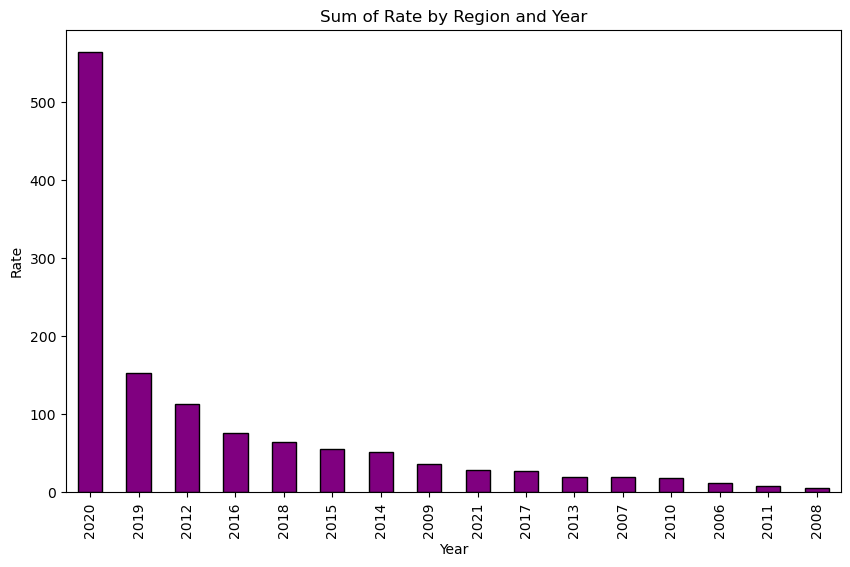

In [62]:
df5.plot(kind='bar',figsize=(10,6) , color='purple', edgecolor='black')
plt.title('Sum of Rate by Region and Year')
plt.xlabel('Year')
plt.ylabel('Rate')

In [70]:
df6 = df[['Year','Region','Count']]

In [71]:
df6

,Year,Region,Count
0,2018,Asia,2474
1,2020,Europe,61
2,2020,Africa,580
3,2020,Europe,2
4,2012,Africa,1217
...,...,...,...
190,2018,N/S America,10598
191,2011,Asia,1358
192,2013,Asia,1703
193,2015,Africa,853


In [72]:
df6 = df6.groupby(['Year','Region']).sum().sort_values(by='Year',ascending=False)
df6

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Europe        15066
     Asia          53516
     Africa        28460
2019 Europe          249
     Africa        44210
     Asia           6458
     N/S America    4276
     Oceania         126
2018 N/S America   13793
     Europe          883
     Asia          16923
2017 Europe         3670
     Asia           1787
     Africa         1467
2016 Asia            627
     N/S America     608
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 N/S America      13
     Asia           3029
2013 Asia           5782
2012 Africa        15264
     N/S America      53
     Asia             61
2011 Asia           1626
     Africa          855
     Europe            0
2010 Europe            1
     Africa          303
2009 N/S America      42
     Africa           27
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2
     Asia            203

Text(0, 0.5, 'Total Count')

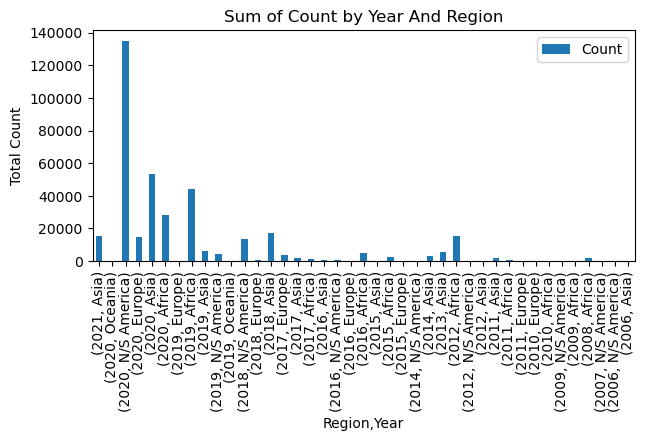

In [73]:
df6.plot(kind='bar',figsize=(7,3))
plt.title("Sum of Count by Year And Region")
plt.xlabel('Region,Year')
plt.ylabel('Total Count')

In [75]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending=False).round(2)
df7


Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [76]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [77]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [78]:
data ={
    'Category':df7.index,
    'Value':df7.values,
    'Info':df7.values
}

df8 = pd.DataFrame(data)
df8

,Category,Value,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29
